# 1.  Изучить набор данных. #
# Создать описание набора данных на русском языке.#  
# Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).#

Дано три файла с данными datatest.txt, datatest2.txt, datatraining.txt.

Каждый набор содержит данные по следующим характеистикам:
- date time - дата и время в формате year-month-day hour:minute:second 
- Temperature - температура в градусах по Цельсию 
- Relative Humidity - относительная влажность в процентах
- Light, in Lux - освещенность
- CO2, in ppm - уровень углекислого газа
- Humidity Ratio - Коэффициент влажности, полученное количество от температуры и относительной влажности, в кг водяного пара /   кг воздуха 
- Occupancy - занятость, 0 или 1, 0 для незанятого, 1 для занятого


Занятость места была получена из фотографий с отметкой времени, которые были сделаны каждую минуту.

# 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции; #

In [1]:
import pandas as pd

df = pd.read_csv('datatraining.txt')

print("Данные набора datatraining.txt до удаления дубликатов:")
df.head()


Данные набора datatraining.txt до удаления дубликатов:


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [2]:
print("Размер данных до удаления дубликатов:", df.shape)

Размер данных до удаления дубликатов: (8143, 7)


In [3]:
df = df.drop_duplicates()
print("Размер данных после удаления дубликатов:", df.shape)

Размер данных после удаления дубликатов: (8143, 7)


Таким образом дубликатов строк не обнаружено

# 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая) #

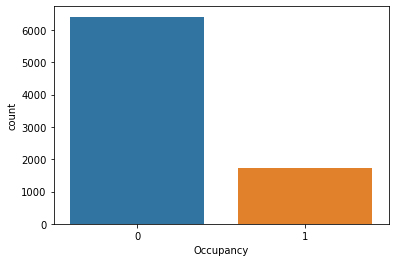

In [4]:
import seaborn as sns

%matplotlib inline

sns.countplot(x='Occupancy', data=df);

Распределение данных по классу Occupancy разное, по остальным классам еще более разное,таким образом данные несбалансированные, испопльзовать будем PR кривую.


# 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию); #

Диаграммы до масштабирования:

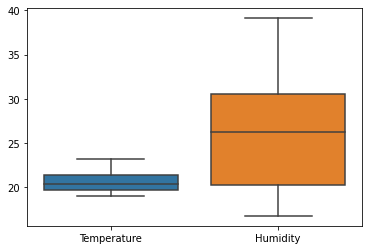

In [5]:
sns.boxplot(data = df[['Temperature','Humidity']]);


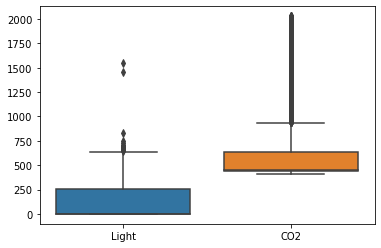

In [6]:
sns.boxplot(data = df[['Light','CO2']]);

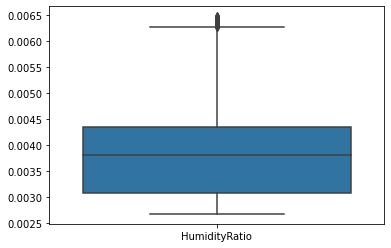

In [7]:
sns.boxplot(data = df[['HumidityRatio']]);

Диаграммы после масштабиования по способу нормализации:
    

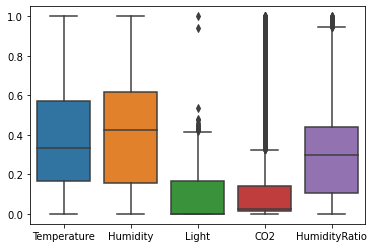

In [8]:
import sklearn as skl
import sklearn.preprocessing as preprocessing

cols = ['Temperature','Humidity','Light','CO2', 'HumidityRatio']
df[cols] = preprocessing.MinMaxScaler().fit_transform(df[cols].values.astype(float))
sns.boxplot(data = df[cols])

# 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены; #

In [13]:
categorical = [c for c in df.columns if df[c].dtype.name == 'object']
not_categorical   = [c for c in df.columns if df[c].dtype.name != 'object']
print("Категориальные признаки =", categorical)
print("Некатегориальные признаки =",not_categorical)

Категориальные признаки = ['date']
Некатегориальные признаки = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


In [14]:
df[categorical].describe()

,date
count,8143
unique,8143
top,2015-02-09 03:16:59
freq,1


Все значения date уникальны, заменять не будем

# 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации); #

In [15]:
df.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


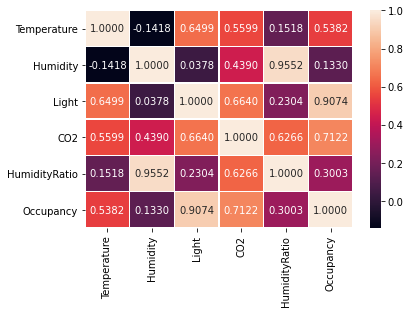

In [16]:
sns.heatmap(df.corr(), annot=True, fmt=".4f", linewidths=.5)

# 7.	Заполните пропущенные значения в данных;#

In [21]:
print(df[['Temperature', 'Humidity','Light','CO2','HumidityRatio','Occupancy']].isnull().sum(axis=1))

1       0
2       0
3       0
4       0
5       0
       ..
8139    0
8140    0
8141    0
8142    0
8143    0
Length: 8143, dtype: int64


In [22]:
df.count()

date             8143
Temperature      8143
Humidity         8143
Light            8143
CO2              8143
HumidityRatio    8143
Occupancy        8143
dtype: int64

Пропущенных значений нет

# 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. #

<b> Классификатор K ближайших соседей (задаётся количество ближайших объектов) </b>

In [72]:

import pandas as pd
import pylab as pl
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
%matplotlib inline

X = df.drop(('date'), axis=1)  # Выбрасываем столбец 'date'.
Y = df.Occupancy
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42) 

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, {'n_neighbors': list(range(1,40))})
grid.fit(X_train, y_train)

n = grid.best_estimator_.n_neighbors
best = grid.best_score_
print('best:', best, ', neighbors num:', n)

knn = KNeighborsClassifier(n_neighbors=n)

knn.fit(X_train, y_train)
predict = knn.predict(X_test)

print('Accuracy:', sk.metrics.accuracy_score(y_test, predict))


best: 1.0 , neighbors num: 1
Accuracy: 1.0


<b> Логический классификатор (бинарное решающее дерево) </b>

In [73]:
tree = DecisionTreeClassifier()

grid = GridSearchCV(tree, {'max_depth': list(range(1, 20)), 'max_features': [0.75, 0.5, 0.25, 0.1, 0.9, 0.3, 0.01]})
grid.fit(X_train, y_train)

best_features = grid.best_estimator_.max_features
best_depth = grid.best_estimator_.max_depth
best_score = grid.best_score_
print('best score:', best_score) 
print('best features:', best_features)
print('best depth:', best_depth)

tree = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
tree.fit(X_train, y_train)
test_score  = np.mean(y_test == tree.predict(X_test))
print('test score: ', best_score)

best score: 1.0
best features: 0.75
best depth: 2
test score:  1.0


<b>Построение PR графика</b>

In [95]:
def GraphPR(proba, occupancy, label, test):
    precision, recall, _ = sk.metrics.precision_recall_curve(test, proba[:, occupancy])
    aps = sk.metrics.average_precision_score(test, proba[:, occupancy])
    plt.plot(recall, precision, label='%s, average_precision = %f' % (label,aps))

Построение PR графика для Occupancy = 0

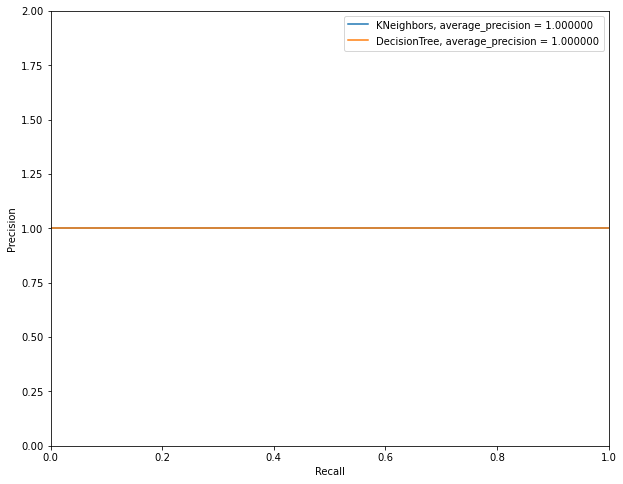

In [119]:
plt.figure(figsize=(10,8))

GraphPR(knn.predict_proba(X_test), 0, 'KNeighbors', [1-y for y in y_test])
GraphPR(tree.predict_proba(X_test), 0, 'DecisionTree', [1-y for y in y_test])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 2.0])
plt.legend()
plt.show()

Построение PR графика для Occupancy = 1

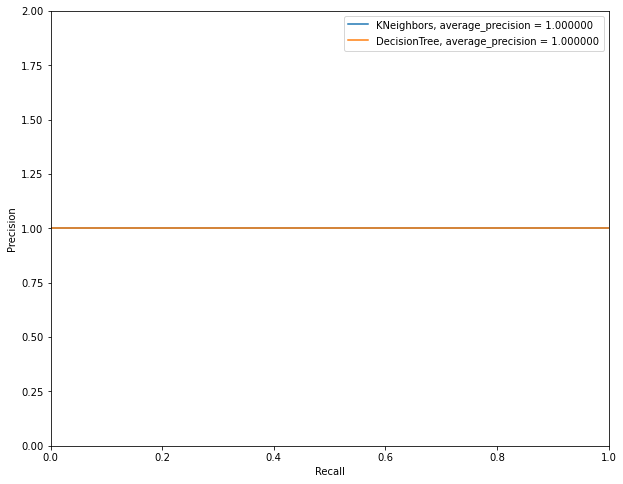

In [118]:
plt.figure(figsize=(10,8))

GraphPR(knn.predict_proba(X_test), 1, 'KNeighbors', y_test)
GraphPR(tree.predict_proba(X_test), 1, 'DecisionTree', y_test)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 2.0])
plt.legend()
plt.show()

<b>Построение ROC графика</b>

In [111]:
def GraphROC(proba, occupancy, label, test):
    tpr, fpr, _ = sk.metrics.roc_curve(test, proba[:, occupancy])
    roc_auc  = sk.metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s, roc_auc = %f' % (label, roc_auc)) 

Построение ROC графика для Occupancy = 0:

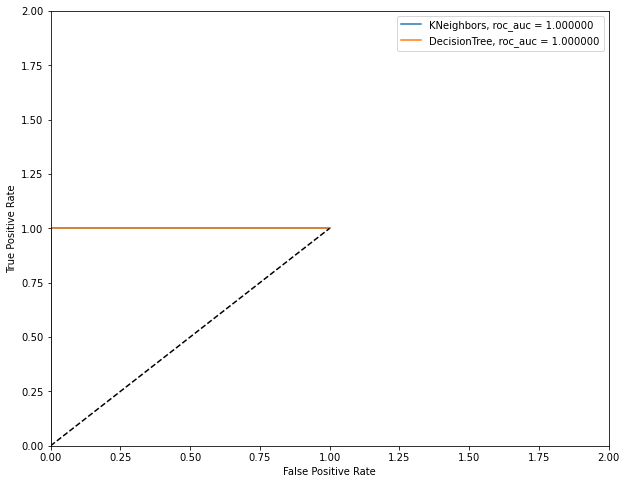

In [117]:
plt.figure(figsize=(10,8))

GraphROC(knn.predict_proba(X_test), 0, 'KNeighbors', y_test)
GraphROC(tree.predict_proba(X_test), 0, 'DecisionTree', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 2.0])
plt.ylim([0.0, 2.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Построение ROC графика для Occupancy = 1:

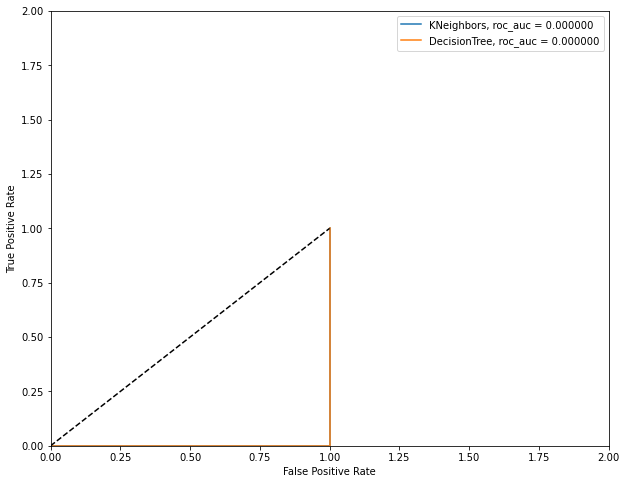

In [116]:
plt.figure(figsize=(10,8))

GraphROC(knn.predict_proba(X_test), 1, 'KNeighbors', y_test)
GraphROC(tree.predict_proba(X_test), 1, 'DecisionTree', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 2.0])
plt.ylim([0.0, 2.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.#

Как видно из предыдущего задания - и PR и ROC кривые для обоих классификаторов совпадают.